# Title: Problem for Covid - 19 Data Analysis Project using Python Dataset link.

# 1. Import the dataset using Pandas from above mentioned url.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)

# 2. High Level Data Understanding: a. Find no. of rows & columns in the dataset.

In [2]:
a,b = df.shape
print(f"Number of rows is {a} and & column is {b}")

Number of rows is 57394 and & column is 49


# b. Data types of columns.

In [4]:
print(df.dtypes)

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

# c. Info & describe of data in dataframe.

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

# 3. Low Level Data Understanding : a. Find count of unique values in location column.

In [6]:
print(df['location'].nunique())

216


# b. Find which continent has maximum frequency using values counts.

In [7]:
print(df['continent'].value_counts().idxmax())

Europe


# c. Find maximum & mean value in 'total_cases'.

In [8]:
print(f"The Maximum Value in total Cases is : {df['total_cases'].max()}")
print(f"The Maximum Value in total Cases is : {round(df['total_cases'].mean())}")

The Maximum Value in total Cases is : 55154651.0
The Maximum Value in total Cases is : 167797


# d. Find 25%,50% & 75% quartile value in 'total_deaths'.

In [9]:
import numpy as np
cf = df['total_cases'].quantile([0.25,0.50,0.75])
cf

0.25      180.00
0.50     2070.00
0.75    22356.75
Name: total_cases, dtype: float64

# e. Find which continent has maximum 'human_development_index'.

In [11]:
df.groupby('continent')['human_development_index'].max().idxmax()

'Europe'

# f. Find which continent has minimum 'gdp_per_capita'.

In [10]:
df.groupby('continent')['gdp_per_capita'].min().idxmin()

'Africa'

# 4. Filter the dataframe with only this columns ['continent','location','date','total_cases','total_deaths','gdp_per_capita',' human_development_index'] and update the data frame.

In [12]:
data = df[['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']]
data

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


# 5. Data Cleaning a. Remove all duplicates observations

In [13]:
df[['continent','location','date','total_cases','total_deaths',"gdp_per_capita",'human_development_index']].drop_duplicates(['continent','location'])
data

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


# b. Find missing values in all columns

In [14]:
data.isnull().sum()

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

# C. Fill all missing values with 0

In [24]:
data = data.fillna(0)
data

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,Month
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498,12,12
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498,1,1
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498,2,2
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498,3,3
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498,4,4
...,...,...,...,...,...,...,...,...,...
57389,0,International,13/11/20,696.0,7.0,0.000,0.000,11,11
57390,0,International,14/11/20,696.0,7.0,0.000,0.000,11,11
57391,0,International,15/11/20,696.0,7.0,0.000,0.000,11,11
57392,0,International,16/11/20,696.0,7.0,0.000,0.000,11,11


# 6. Date time format : a. Convert date column in datetime format using pandas.to_datetime

In [17]:
print(data.isna().sum())
data = data.fillna(0)
data

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
57389,0,International,13/11/20,696.0,7.0,0.000,0.000
57390,0,International,14/11/20,696.0,7.0,0.000,0.000
57391,0,International,15/11/20,696.0,7.0,0.000,0.000
57392,0,International,16/11/20,696.0,7.0,0.000,0.000


# b. Create new column month after extracting month data from date column.

In [19]:
data['month'] = pd.DatetimeIndex(data['date']).month
data['Month'] = data['month']
data

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,Month
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498,12,12
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498,1,1
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498,2,2
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498,3,3
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498,4,4
...,...,...,...,...,...,...,...,...,...
57389,0,International,13/11/20,696.0,7.0,0.000,0.000,11,11
57390,0,International,14/11/20,696.0,7.0,0.000,0.000,11,11
57391,0,International,15/11/20,696.0,7.0,0.000,0.000,11,11
57392,0,International,16/11/20,696.0,7.0,0.000,0.000,11,11


# 7. Data Aggregation: a. Find max value in all columns using groupby function on 'continent' column Tip: use reset_index() after applying groupb

In [25]:
df_group_by = data.groupby(['continent']).max().reset_index()
df_group_by

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,Month
0,0,World,31/12/19,55154651.0,1328537.0,15469.207,0.000,12,12
1,Africa,Zimbabwe,31/12/19,752269.0,20314.0,26382.287,0.797,12,12
2,Asia,Yemen,31/12/19,8874290.0,130519.0,116935.600,0.933,12,12
3,Europe,Vatican,31/12/19,1991233.0,52147.0,94277.965,0.953,12,12
4,North America,United States Virgin Islands,31/12/19,11205486.0,247220.0,54225.446,0.926,12,12
5,Oceania,Wallis and Futuna,31/12/19,27750.0,907.0,44648.710,0.939,12,12
6,South America,Venezuela,31/12/19,5876464.0,166014.0,22767.037,0.843,12,12


# Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases

In [26]:
data["total_deaths_to_total_cases"] = data['total_cases']/data['total_deaths']
data["total_deaths_to_total_cases"].sample(10)

21772     25.587166
42743    102.469829
32321     71.762295
25526     15.327508
48516    257.615385
47782     54.216216
49730     29.867629
33819    150.250000
26835     29.428571
36674    179.704095
Name: total_deaths_to_total_cases, dtype: float64

# Data Visualiazation:

# Perform Univariate analysis on 'gdp_per_capita' column by plotting

C:\Users\91938\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


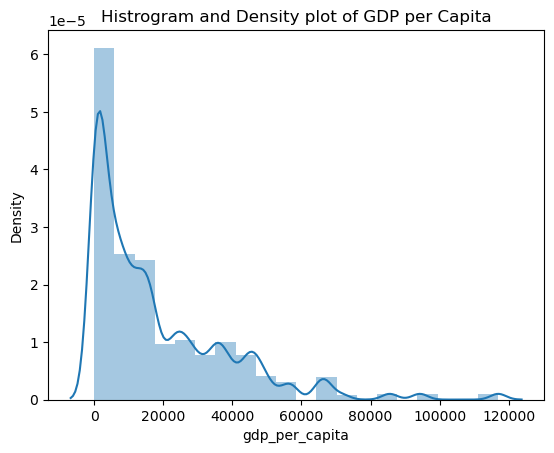

In [27]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.distplot(data['gdp_per_capita'],bins = 20 , kde = True )
plt.xlabel('gdp_per_capita')
plt.title('Histrogram and Density plot of GDP per Capita')
plt.show()

# Plot a scatter plot of 'total_cases' & 'gdp_per_capita'

Text(0.5, 1.0, 'PLOT OF TOTAL_CASES & GDP_PER_CAPITA')

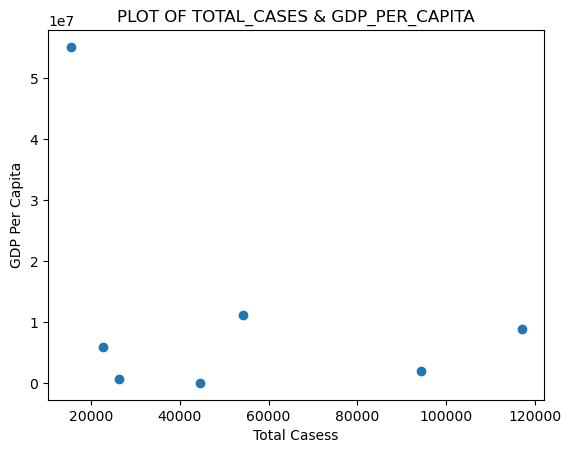

In [28]:
plt.scatter(df_group_by['gdp_per_capita'], df_group_by['total_cases'])
plt.xlabel('Total Casess')
plt.ylabel('GDP Per Capita')
plt.title('plot of total_cases & gdp_per_capita'.upper())

# 3. Plot a bar plot of 'continent' column with 'total_cases'.

<AxesSubplot:xlabel='continent', ylabel='total_cases'>

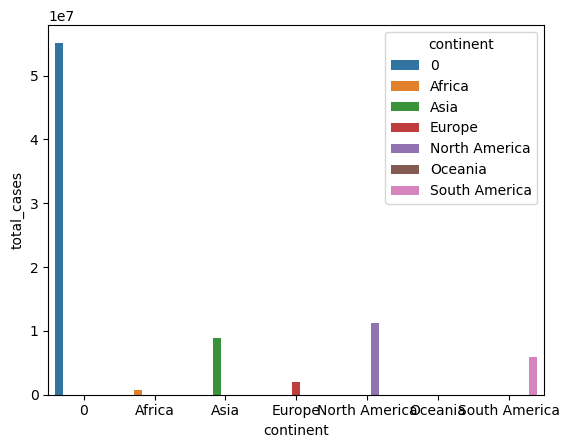

In [29]:
sns.barplot(x= 'continent', y ='total_cases', data = df_group_by,hue = 'continent')

In [30]:
from pathlib import Path  
filepath = Path('Final Project.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_group_by.to_csv(filepath)